In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

Import CSV files 

In [63]:
df_factories_profit = pd.read_csv ("Data/factories_profit.csv")
df_products_profit = pd.read_csv ("Data/products_profit.csv")
df_product_sales_factory = pd.read_csv ("Data/produt_sales_factory.csv")
df_product_margin_factory = pd.read_csv ("Data/profit_margin_factory.csv")
df_profit_and_sales_factory = pd.read_csv ("Data/profit&sales_factory.csv")
df_customer_loyalty = pd.read_csv ("Data/customer_loyalty.csv")

Hypothesis 1: Jussara
	
	Company Profit ( Gross Profit / Cost, by product ):

Which Wonka products are more profitable, are there products that have bigger cost than profit?
Should we focus on the most profitable products and stop selling the higher cost / low profit products? 


Most Profitable Products

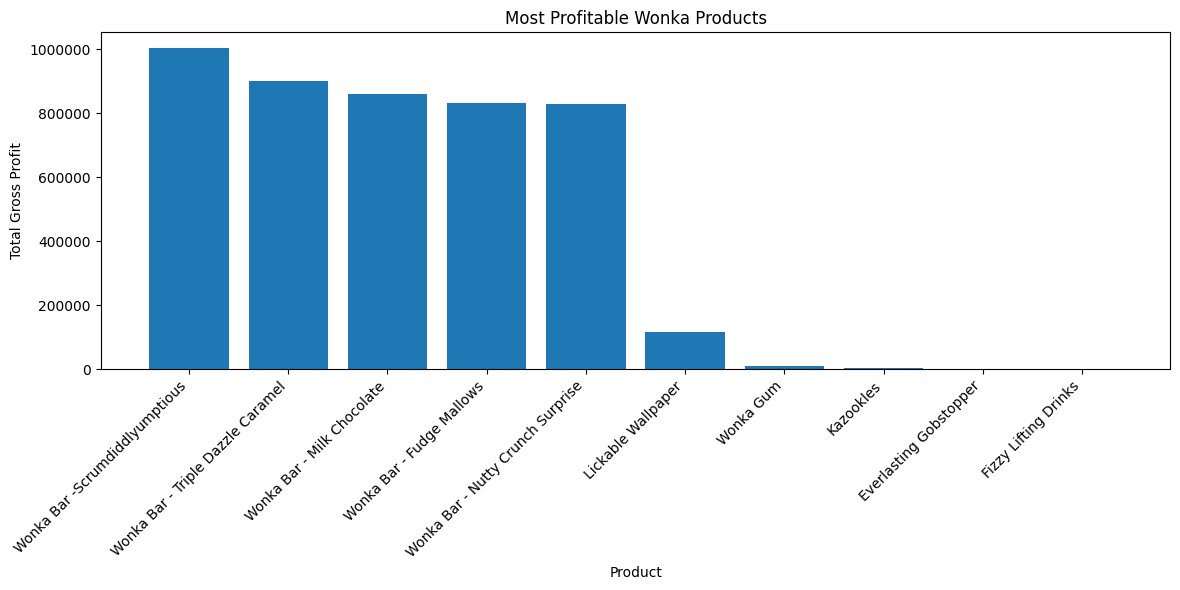

In [33]:
df_top10 = (
    df_products_profit
    .sort_values(by="total_profit", ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
plt.bar(df_top10["product_name"], df_top10["total_profit"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Gross Profit")
plt.xlabel("Product")
plt.title("Most Profitable Wonka Products")
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')

plt.show()


-- 'Wonka Bar -Scrumdiddlyumptious','18907.5'
-- 'Wonka Bar - Triple Dazzle Caramel','18350.49999999999'
-- 'Wonka Bar - Milk Chocolate','16877.88999999987'
-- 'Wonka Bar - Nutty Crunch Surprise','16593.35999999972'
-- 'Wonka Bar - Fudge Mallows','16300.799999999987'
-- 'Lickable Wallpaper','3790'
-- 'Wonka Gum','310.69999999999993'
-- 'Everlasting Gobstopper','104'
-- 'Kazookles','92.75'
-- 'Hair Toffee','59.5'
-- -- 'Laffy Taffy','33.48'
-- 'Sweetarts','28.700000000000003'
-- 'Fun Dip','4.8'

profit per unit 

-- 'Lickable Wallpaper','10'

-- 'Everlasting Gobstopper','8'

-- 'Wonka Bar -Scrumdiddlyumptious','2.5'

-- 'Wonka Bar - Nutty Crunch Surprise','2.489999999999958'

-- 'Wonka Bar - Triple Dazzle Caramel','2.4499999999999984'

-- 'Wonka Bar - Fudge Mallows','2.399999999999998'

-- 'Fizzy Lifting Drinks','2.25'

-- 'Wonka Bar - Milk Chocolate','2.1099999999999834'

-- 'Laffy Taffy','1.24'

-- 'Sweetarts','0.7000000000000001'

-- 'Nerds','0.7'

-- 'Wonka Gum','0.6499999999999999'

-- 'Fun Dip','0.6'

-- 'Kazookles','0.25'

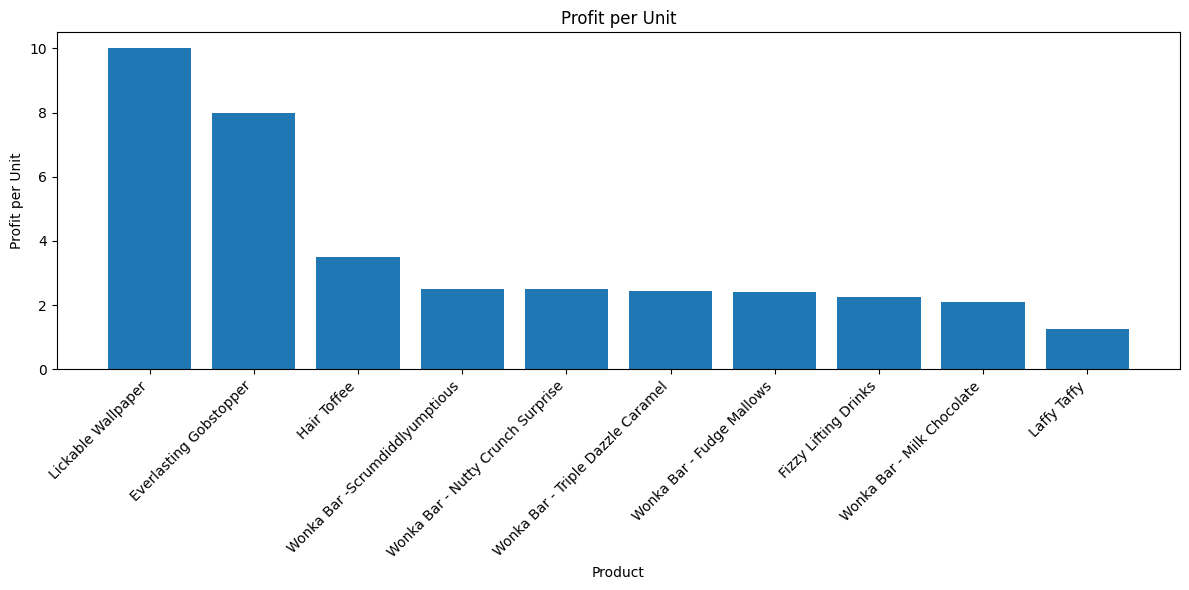

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df_big = pd.read_csv("Data/wonka_choc_factory_clean.csv")

df_ppu = (
    df_big.groupby("Product Name", as_index=False)
          .agg(total_profit=("Gross Profit", "sum"),
               total_units=("Units", "sum"))
)

df_ppu = df_ppu[df_ppu["total_units"] != 0].copy()
df_ppu["profit_per_unit"] = df_ppu["total_profit"] / df_ppu["total_units"]

df_top10 = df_ppu.sort_values("profit_per_unit", ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(df_top10["Product Name"], df_top10["profit_per_unit"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Profit per Unit")
plt.xlabel("Product")
plt.title("Profit per Unit")
plt.tight_layout()
plt.show()



Products where cost is higher than profit

		-- total cost/total profit

 -- 'Kazookles','1113','92.75'

-- 'Nerds','8','7'

-- 'Fun Dip','7.2','4.8'

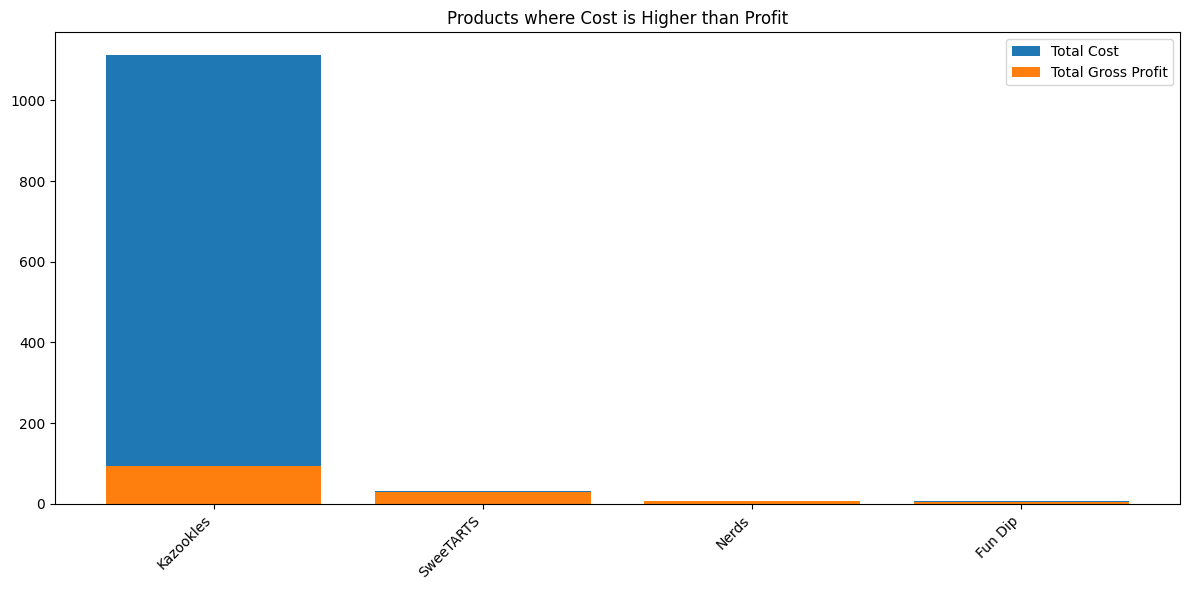

In [43]:
df_products = pd.read_csv("Data/products_profit_margin.csv")

df_bad = df_products[df_products["total_cost"] > df_products["total_profit"]].sort_values("total_cost", ascending=False)

plt.figure(figsize=(12,6))
plt.bar(df_bad["product_name"], df_bad["total_cost"], label="Total Cost")
plt.bar(df_bad["product_name"], df_bad["total_profit"], label="Total Gross Profit")
plt.xticks(rotation=45, ha="right")
plt.title("Products where Cost is Higher than Profit")
plt.legend()
plt.tight_layout()
plt.show()


Hypothesis 2: Blanca

	Company Sales ( Profit by Factory / Location)

Evaluate profit by factory, cost efficiency by location and region, shipping mode (“Standard vs First Class”) may create patterns.
	Is Wonka profitable in every factory, are there factories that have a negative
revenue?
If so, should we close these factories?


Total profit & sales by factory:

-- Lot's O'Nuts made more than 3.8 Million dollars selling more then 1 Million units being the top seller 
-- at Wonka Company.
-- Wicked Choccy's with the 2nd place selling almost 775k units, making more than 2.7 Million dollars and 
-- a profit of 1.75 Million.
-- Secret Factory with intermediate but healthy results, making 256k dollars in sales, a profit of 128k
-- with only 28k units sold. 
-- Sugar Shack does not show many units sold, with only 734 single units sold, making only 1490 dollars
-- and a total profit of 823.24 dollars, although this seems negative they're still positive numbers 
-- and suggests higher profit per unit, just not as demanding as the other 3 factories we mentioned before. 
-- The Other Factory has bad results overall, still profitable but can be considered for closure,
-- sitting with more than 10k units sold and a total profit of only 2682 dollars. 
-- The Other Factory results tells us we should focus more on the other factories or restructure the
-- whole factory sales strategy. 

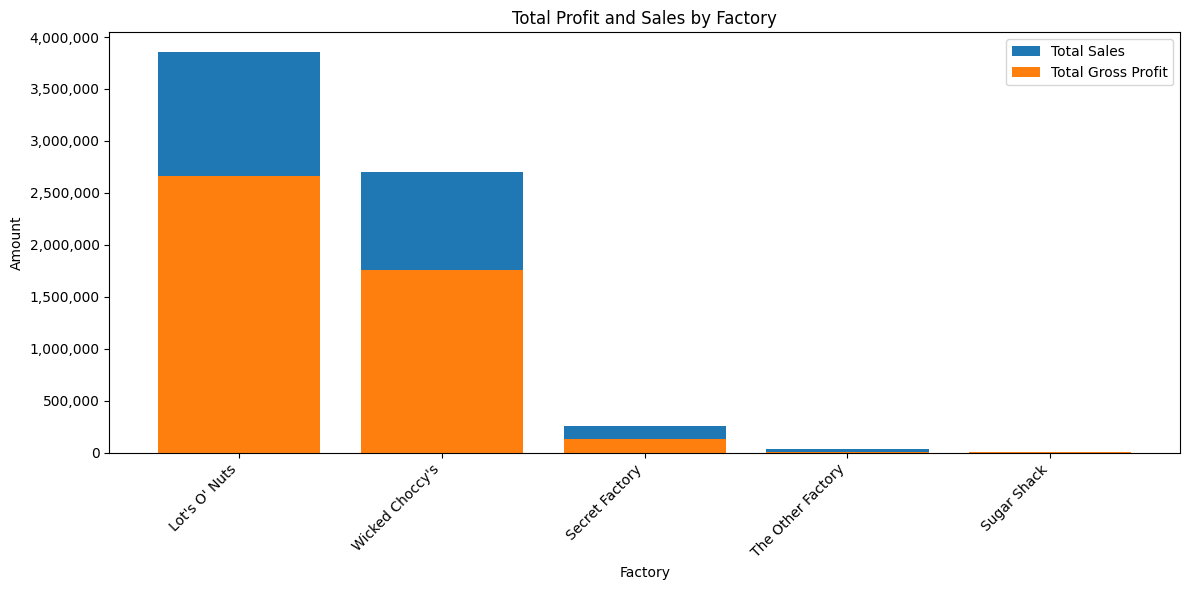

Detected columns → factory: factory_name | profit: total_profit ($) | sales: total_sales ($)


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load data
df = pd.read_csv("Data/profit&sales_factory.csv")

# --- Auto-detect columns (NO renaming) ---
cols = list(df.columns)
cols_lower = [c.lower() for c in cols]

def pick_col(must_contain_any, exclude_any=()):
    for c, cl in zip(cols, cols_lower):
        if any(k in cl for k in must_contain_any) and not any(k in cl for k in exclude_any):
            return c
    return None

factory_col = pick_col(["factory"], exclude_any=["id"])
profit_col  = pick_col(["profit"], exclude_any=["margin", "%", "rate"])
sales_col   = pick_col(["sales", "revenue"], exclude_any=["margin", "%", "rate"])

if factory_col is None or profit_col is None or sales_col is None:
    raise ValueError(
        "Could not detect required columns.\n"
        f"Columns found: {cols}\n"
        f"Detected -> factory: {factory_col}, profit: {profit_col}, sales: {sales_col}"
    )

# Ensure numeric
df[profit_col] = pd.to_numeric(df[profit_col], errors="coerce").fillna(0)
df[sales_col]  = pd.to_numeric(df[sales_col], errors="coerce").fillna(0)

# Sort by profit
df = df.sort_values(by=profit_col, ascending=False)

# Plot
plt.figure(figsize=(12, 6))

plt.bar(df[factory_col], df[sales_col], label="Total Sales")
plt.bar(df[factory_col], df[profit_col], label="Total Gross Profit")

plt.xticks(rotation=45, ha="right")
plt.xlabel("Factory")
plt.ylabel("Amount")
plt.title("Total Profit and Sales by Factory")
plt.legend()

# Format Y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

print("Detected columns →",
      "factory:", factory_col,
      "| profit:", profit_col,
      "| sales:", sales_col)



Profit margin by factory:

-- Nearly 70% of Lot's O'Nuts revenue becomes profit;
    -- This factory is highly cost-efficient and a great candidate for increased production as well as a 
    -- replicator for its operation model elsewhere.
    -- Wicked Choccy's with almost same results (65%) also applies to this insights.
    -- Both have consistent profitability.
    -- Sugar Shack and Secret Factory are both intermediate factories sitting between 50% - 60%.
    -- Both have moderate profitability but both healthy, worth optimizing rather than closing.
    -- The Other Factory with 8% profit margin only.
    -- It's a critical concern to the company, should be audited immediatly and considered for restructuring
    -- or closure.
-- Is revenue concentration happening in one factory?
	-- No, revenue is dissipated through most factories ranging between 50% to 70% which is a healthy range. 
    -- From the 5 Factories, only one is in negative shape.

-- What type of product sells more at each factory?

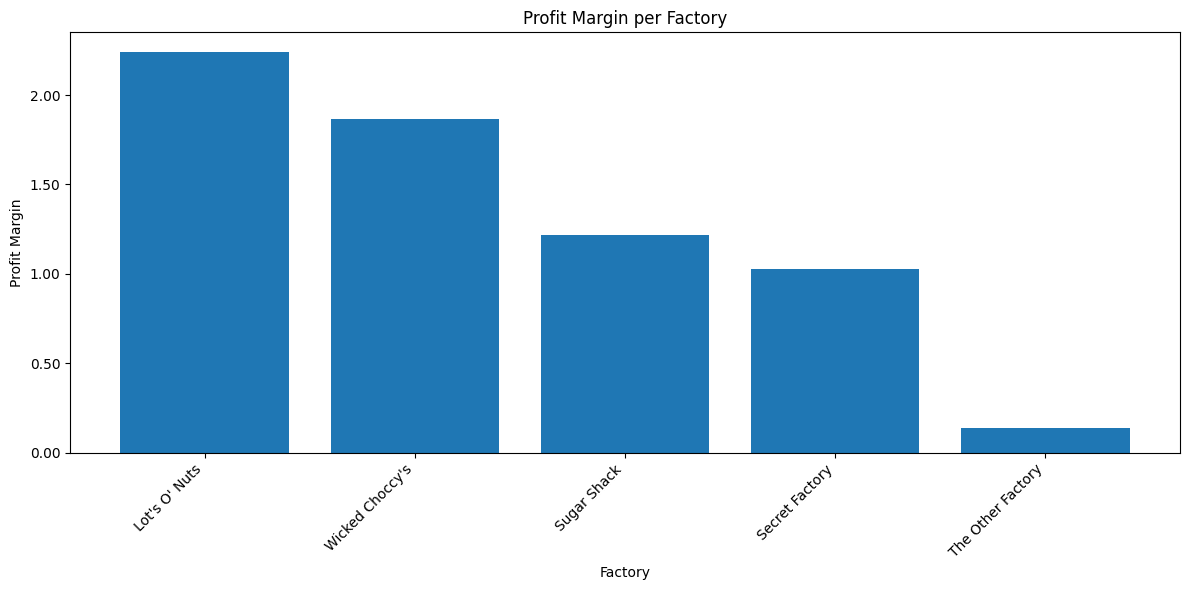

Detected columns → factory: factory_name | margin: profit_margin


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load data (pick the one you actually use)
df = pd.read_csv("Data/profit_margin_factory.csv")   # or "Data/factories_profit.csv"

# --- Auto-detect columns (NO renaming) ---
cols = list(df.columns)
cols_lower = [c.lower() for c in cols]

def pick_col(must_contain_any, exclude_any=()):
    for c, cl in zip(cols, cols_lower):
        if any(k in cl for k in must_contain_any) and not any(k in cl for k in exclude_any):
            return c
    return None

factory_col = pick_col(["factory"], exclude_any=["id"])
margin_col  = pick_col(["margin"], exclude_any=["cost", "profit", "sales"]) or pick_col(["profit_margin", "margin%","%"])

if factory_col is None or margin_col is None:
    raise ValueError(
        "Could not detect required columns.\n"
        f"Columns found: {cols}\n"
        f"Detected -> factory: {factory_col}, margin: {margin_col}"
    )

# Ensure numeric
df[margin_col] = pd.to_numeric(df[margin_col], errors="coerce").fillna(0)

# If margin seems to be ratio (0-1), convert to %
# (This does not rename or change columns, only the plotted values)
values = df[margin_col].copy()
if values.max() <= 1.5:   # likely a ratio
    values_to_plot = values * 100
    y_label = "Profit Margin (%)"
else:
    values_to_plot = values
    y_label = "Profit Margin"

# Sort by margin
df_plot = df.copy()
df_plot["__margin_to_plot__"] = values_to_plot
df_plot = df_plot.sort_values(by="__margin_to_plot__", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df_plot[factory_col], df_plot["__margin_to_plot__"])

plt.xticks(rotation=45, ha="right")
plt.xlabel("Factory")
plt.ylabel(y_label)
plt.title("Profit Margin per Factory")

# Format y-axis nicely
ax = plt.gca()
if y_label.endswith("(%)"):
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.1f}%'))
else:
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.2f}'))

plt.tight_layout()
plt.show()

print("Detected columns →", "factory:", factory_col, "| margin:", margin_col)


What type of product sells more at each factory?

-- Lot’s O’ Nuts and Wicked Choccy’s are the company’s primary production hubs, each selling over 700,000 
-- units across a small number of high-demand Wonka Bar products. This indicates strong economies of scale 
-- and a clear focus on core chocolate offerings.

-- Wonka Bars dominate total unit sales, confirming they are the company’s flagship products and the 
-- main drivers of manufacturing volume. 

-- Secret Factory operates at a significantly smaller scale, producing niche and novelty products such
-- as Wonka Gum and Lickable Wallpaper. While volumes are low, these products may justify their existence 
-- through higher margins or strategic brand value.

-- Sugar Shack produces a wide variety of products but at very low unit volumes. This suggests 
-- small-batch or experimental production, which may support product diversification but does not 
-- significantly contribute to total sales volume.

-- The Other Factory relies almost entirely on a single product (Kazookles), creating a potential 
-- operational risk. Without diversification or improved profitability, this factory may require 
-- restructuring or closure as mentioned before. 

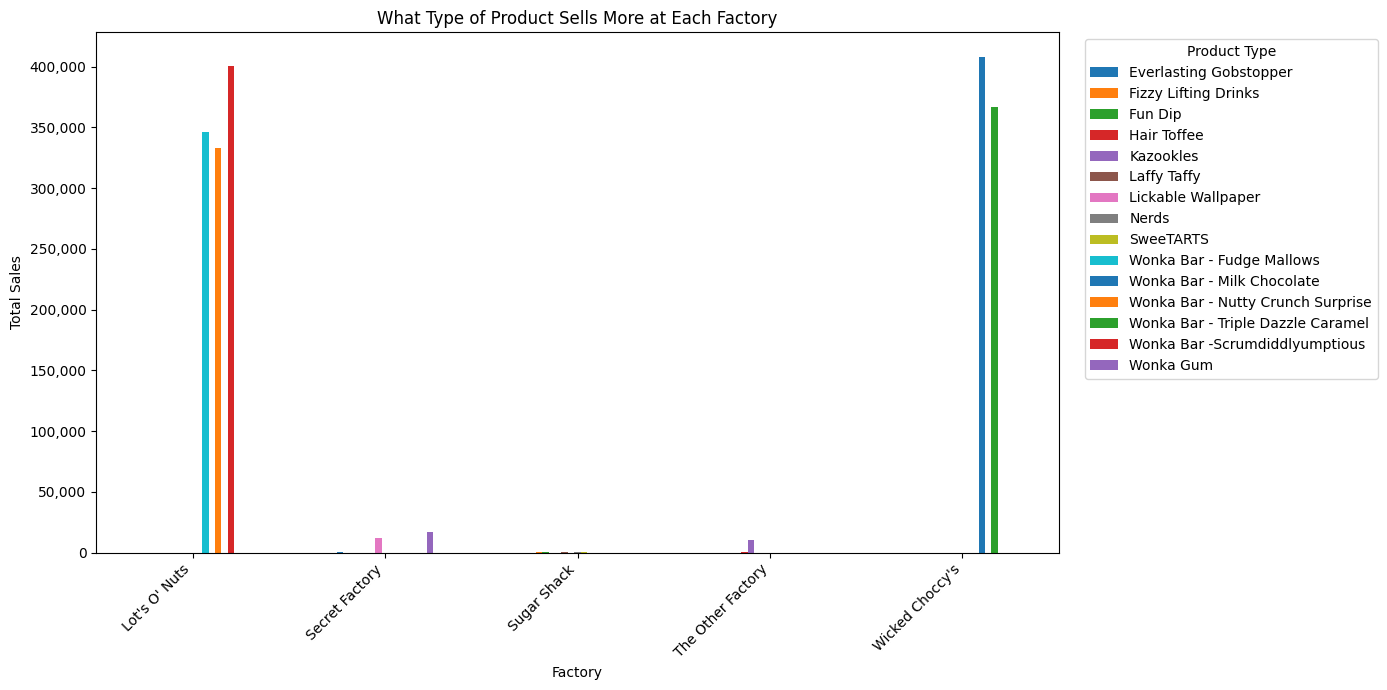

Detected columns → factory: factory_name | product: product_name | sales: total_units_sold


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load data
df = pd.read_csv("Data/produt_sales_factory.csv")

# --- Auto-detect columns (NO renaming) ---
cols = list(df.columns)
cols_lower = [c.lower() for c in cols]

def pick_col(must_contain_any, exclude_any=()):
    for c, cl in zip(cols, cols_lower):
        if any(k in cl for k in must_contain_any) and not any(k in cl for k in exclude_any):
            return c
    return None

factory_col = pick_col(["factory"], exclude_any=["id"])
product_col = pick_col(["product"], exclude_any=["id"])
sales_col   = pick_col(["sales", "quantity", "units"], exclude_any=["profit", "margin", "cost"])

if factory_col is None or product_col is None or sales_col is None:
    raise ValueError(
        "Could not detect required columns.\n"
        f"Columns found: {cols}\n"
        f"Detected -> factory: {factory_col}, product: {product_col}, sales: {sales_col}"
    )

# Ensure numeric sales
df[sales_col] = pd.to_numeric(df[sales_col], errors="coerce").fillna(0)

# Aggregate in case the CSV is not fully aggregated
df_agg = (
    df.groupby([factory_col, product_col], as_index=False)
      .agg(total_sales=(sales_col, "sum"))
)

# Pivot for plotting
pivot_df = df_agg.pivot(
    index=factory_col,
    columns=product_col,
    values="total_sales"
).fillna(0)

# Plot (grouped bars)
pivot_df.plot(
    kind="bar",
    figsize=(14, 7)
)

plt.xlabel("Factory")
plt.ylabel("Total Sales")
plt.title("What Type of Product Sells More at Each Factory")
plt.xticks(rotation=45, ha="right")

# Format Y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.legend(title="Product Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

print("Detected columns →",
      "factory:", factory_col,
      "| product:", product_col,
      "| sales:", sales_col)


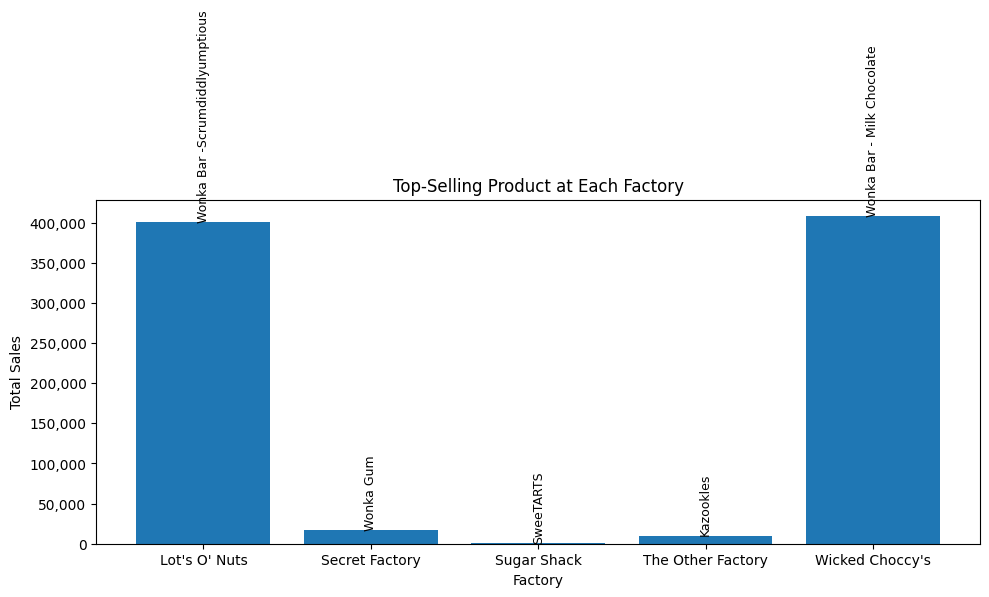

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load data
df = pd.read_csv("Data/produt_sales_factory.csv")

# Detect columns (as-is, no renaming)
cols = df.columns
factory_col = [c for c in cols if "factory" in c.lower()][0]
product_col = [c for c in cols if "product" in c.lower()][0]
sales_col   = [c for c in cols if any(k in c.lower() for k in ["sales", "quantity", "units"])][0]

# Aggregate
df_agg = (
    df.groupby([factory_col, product_col], as_index=False)
      .agg(total_sales=(sales_col, "sum"))
)

# Keep ONLY the top-selling product per factory
df_top = df_agg.loc[
    df_agg.groupby(factory_col)["total_sales"].idxmax()
]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df_top[factory_col], df_top["total_sales"])

plt.xlabel("Factory")
plt.ylabel("Total Sales")
plt.title("Top-Selling Product at Each Factory")

# Annotate product name on bars
for i, row in df_top.iterrows():
    plt.text(
        row[factory_col],
        row["total_sales"],
        row[product_col],
        ha="center",
        va="bottom",
        fontsize=9,
        rotation=90
    )

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()


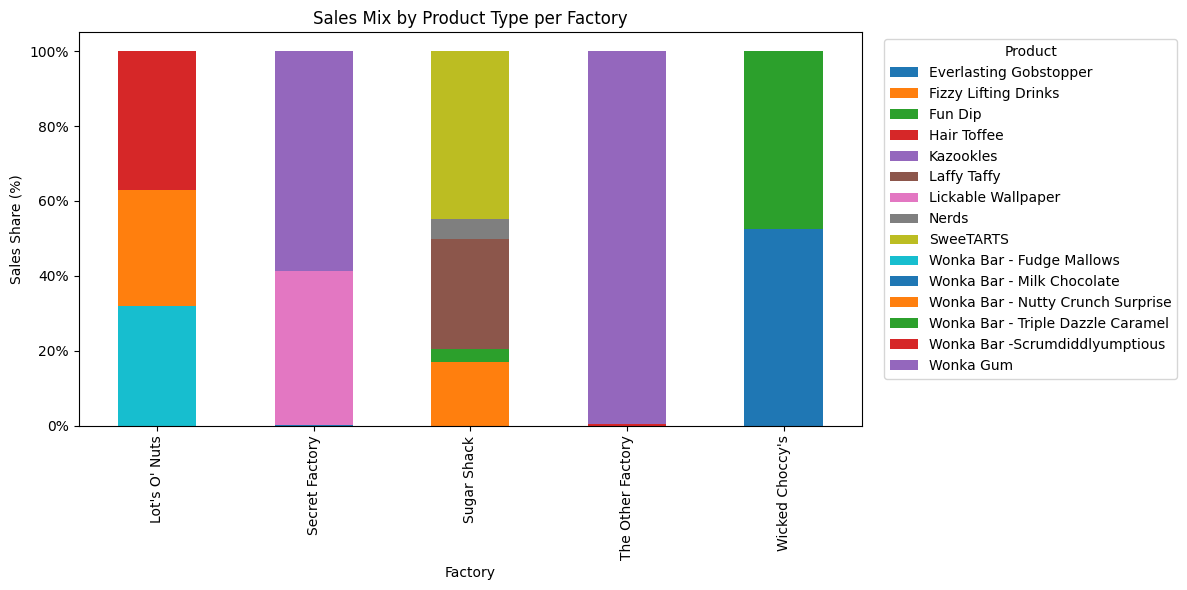

In [49]:
# Pivot to percentage
pivot = df_agg.pivot(
    index=factory_col,
    columns=product_col,
    values="total_sales"
).fillna(0)

pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Plot
pivot_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6)
)

plt.xlabel("Factory")
plt.ylabel("Sales Share (%)")
plt.title("Sales Mix by Product Type per Factory")
plt.legend(title="Product", bbox_to_anchor=(1.02, 1), loc="upper left")

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}%'))

plt.tight_layout()
plt.show()


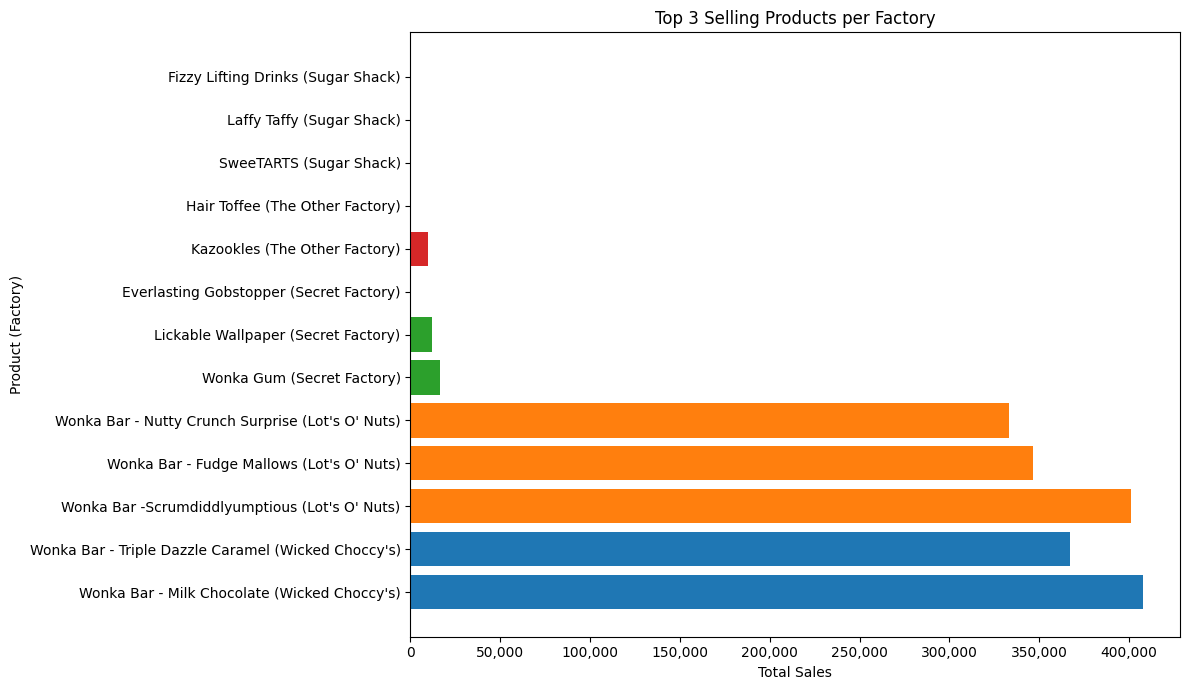

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load data
df = pd.read_csv("Data/produt_sales_factory.csv")

# Detect columns (as-is)
cols = df.columns
factory_col = [c for c in cols if "factory" in c.lower()][0]
product_col = [c for c in cols if "product" in c.lower()][0]
sales_col   = [c for c in cols if any(k in c.lower() for k in ["sales", "quantity", "units"])][0]

# Aggregate
df_agg = (
    df.groupby([factory_col, product_col], as_index=False)
      .agg(total_sales=(sales_col, "sum"))
)

# Keep top 3 products per factory
df_top3 = (
    df_agg.sort_values("total_sales", ascending=False)
          .groupby(factory_col)
          .head(3)
)

# Plot
plt.figure(figsize=(12, 7))

for factory in df_top3[factory_col].unique():
    subset = df_top3[df_top3[factory_col] == factory]
    plt.barh(
        subset[product_col] + " (" + factory + ")",
        subset["total_sales"]
    )

plt.xlabel("Total Sales")
plt.ylabel("Product (Factory)")
plt.title("Top 3 Selling Products per Factory")

ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()


In [52]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


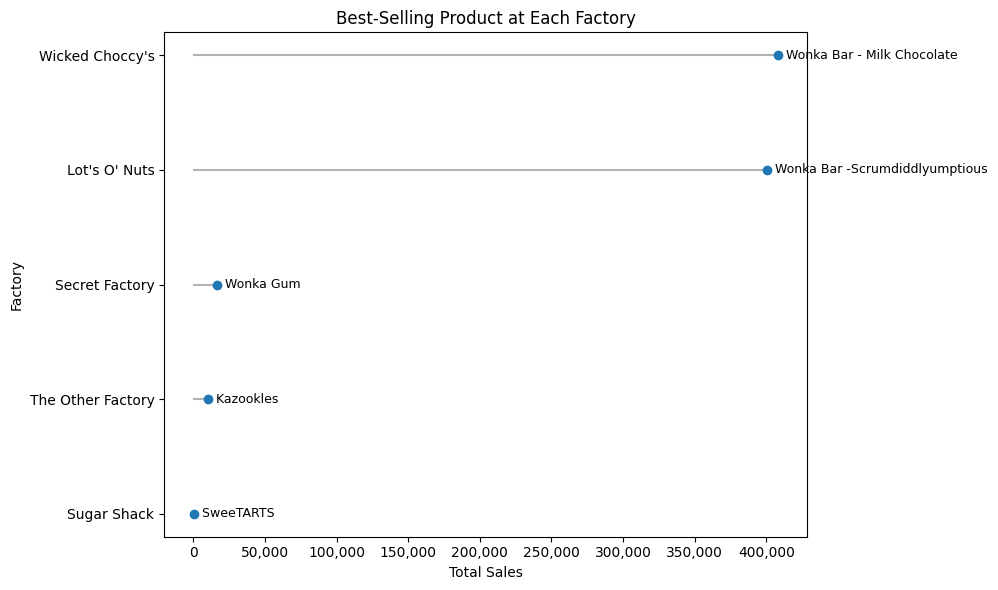

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load data
df = pd.read_csv("Data/produt_sales_factory.csv")

# Detect columns (as-is)
cols = df.columns
factory_col = [c for c in cols if "factory" in c.lower()][0]
product_col = [c for c in cols if "product" in c.lower()][0]
sales_col   = [c for c in cols if any(k in c.lower() for k in ["sales", "quantity", "units"])][0]

# Aggregate sales
df_agg = (
    df.groupby([factory_col, product_col], as_index=False)
      .agg(total_sales=(sales_col, "sum"))
)

# Get top-selling product per factory
df_top = df_agg.loc[
    df_agg.groupby(factory_col)["total_sales"].idxmax()
].sort_values("total_sales")

# Plot (lollipop)
plt.figure(figsize=(10, 6))

plt.hlines(
    y=df_top[factory_col],
    xmin=0,
    xmax=df_top["total_sales"],
    color="gray",
    alpha=0.6
)

plt.plot(
    df_top["total_sales"],
    df_top[factory_col],
    "o"
)

# Add product labels
for _, row in df_top.iterrows():
    plt.text(
        row["total_sales"],
        row[factory_col],
        f"  {row[product_col]}",
        va="center",
        fontsize=9
    )

plt.xlabel("Total Sales")
plt.ylabel("Factory")
plt.title("Best-Selling Product at Each Factory")

ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()


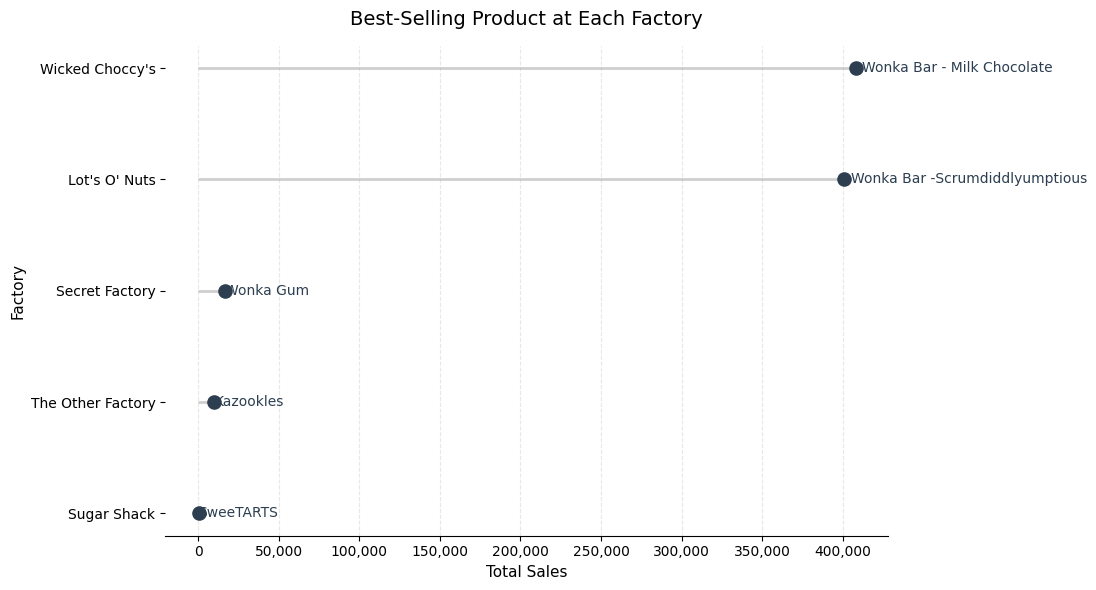

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load data
df = pd.read_csv("Data/produt_sales_factory.csv")

# Detect columns (as-is)
cols = df.columns
factory_col = [c for c in cols if "factory" in c.lower()][0]
product_col = [c for c in cols if "product" in c.lower()][0]
sales_col   = [c for c in cols if any(k in c.lower() for k in ["sales", "quantity", "units"])][0]

# Aggregate sales
df_agg = (
    df.groupby([factory_col, product_col], as_index=False)
      .agg(total_sales=(sales_col, "sum"))
)

# Best-selling product per factory
df_top = (
    df_agg.loc[df_agg.groupby(factory_col)["total_sales"].idxmax()]
    .sort_values("total_sales")
)

# --------------------
# Plot (polished)
# --------------------
plt.figure(figsize=(11, 6))

# Light horizontal lines
plt.hlines(
    y=df_top[factory_col],
    xmin=0,
    xmax=df_top["total_sales"],
    color="#B0B0B0",
    linewidth=2,
    alpha=0.6
)

# Points
plt.scatter(
    df_top["total_sales"],
    df_top[factory_col],
    s=90,
    color="#2C3E50",
    zorder=3
)

# Labels (product names)
for _, row in df_top.iterrows():
    plt.text(
        row["total_sales"] * 1.01,
        row[factory_col],
        row[product_col],
        va="center",
        fontsize=10,
        color="#2C3E50"
    )

# Titles & labels
plt.title(
    "Best-Selling Product at Each Factory",
    fontsize=14,
    pad=15
)
plt.xlabel("Total Sales", fontsize=11)
plt.ylabel("Factory", fontsize=11)

# Clean axis
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


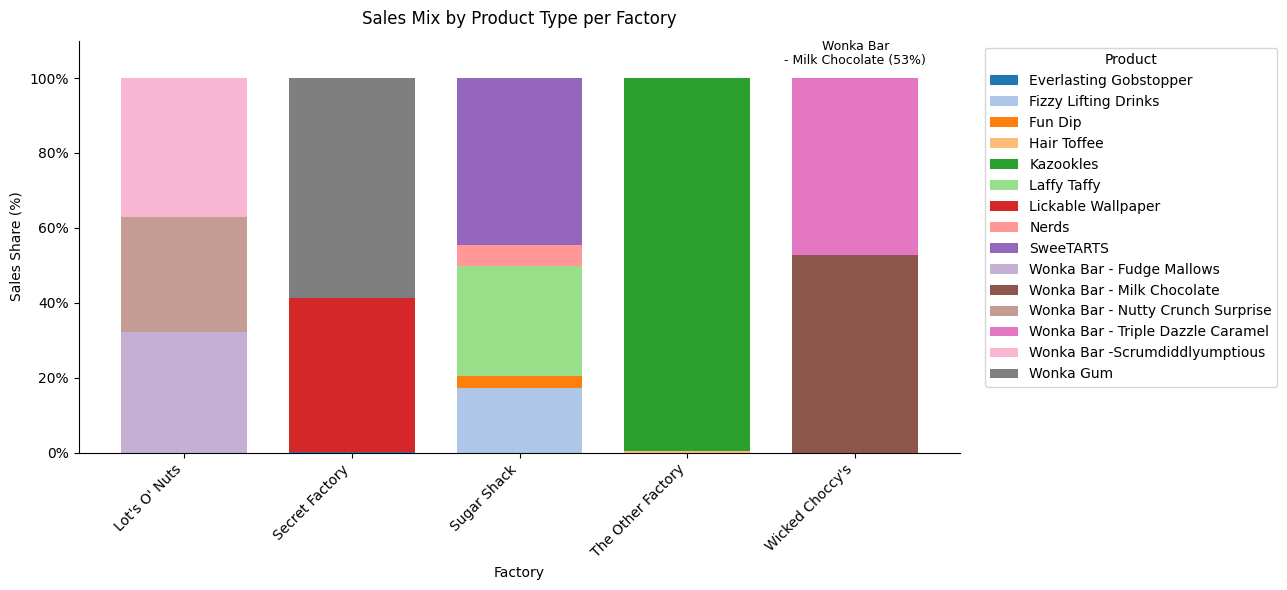

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load data
df = pd.read_csv("Data/produt_sales_factory.csv")

# Detect columns (as-is)
cols = df.columns
factory_col = [c for c in cols if "factory" in c.lower()][0]
product_col = [c for c in cols if "product" in c.lower()][0]
sales_col   = [c for c in cols if any(k in c.lower() for k in ["sales", "quantity", "units"])][0]

# Aggregate
df_agg = (
    df.groupby([factory_col, product_col], as_index=False)
      .agg(total_sales=(sales_col, "sum"))
)

# Pivot (absolute) + convert to %
pivot = df_agg.pivot(index=factory_col, columns=product_col, values="total_sales").fillna(0)
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

# --- Plot (100% stacked) with better colors ---
fig, ax = plt.subplots(figsize=(13, 6))

# Use a colormap to generate distinct colors (no repeats like default cycle)
cmap = plt.get_cmap("tab20")  # good for many categories
colors = [cmap(i) for i in range(pivot_pct.shape[1])]

pivot_pct.plot(kind="bar", stacked=True, ax=ax, color=colors, width=0.75)

# Axis formatting
ax.set_title("Sales Mix by Product Type per Factory", pad=12)
ax.set_xlabel("Factory")
ax.set_ylabel("Sales Share (%)")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}%'))
ax.set_ylim(0, 110)  # add headroom for the label on top
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(rotation=45, ha="right")

# --- Add label above each bar: top product + % ---
top_product = pivot_pct.idxmax(axis=1)      # product name with max share per factory
top_share   = pivot_pct.max(axis=1)         # max % per factory

for i, factory in enumerate(pivot_pct.index):
    product_label = top_product.loc[factory]

# Force line break for long Wonka Bar names
if product_label.startswith("Wonka Bar"):
    product_label = product_label.replace("Wonka Bar - ", "Wonka Bar\n- ")

label = f"{product_label} ({top_share.loc[factory]:.0f}%)"

ax.text(
    i,
    103,
    label,
    ha="center",
    va="bottom",
    fontsize=9,
    linespacing=1.1
)


# Legend
ax.legend(title="Product", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()


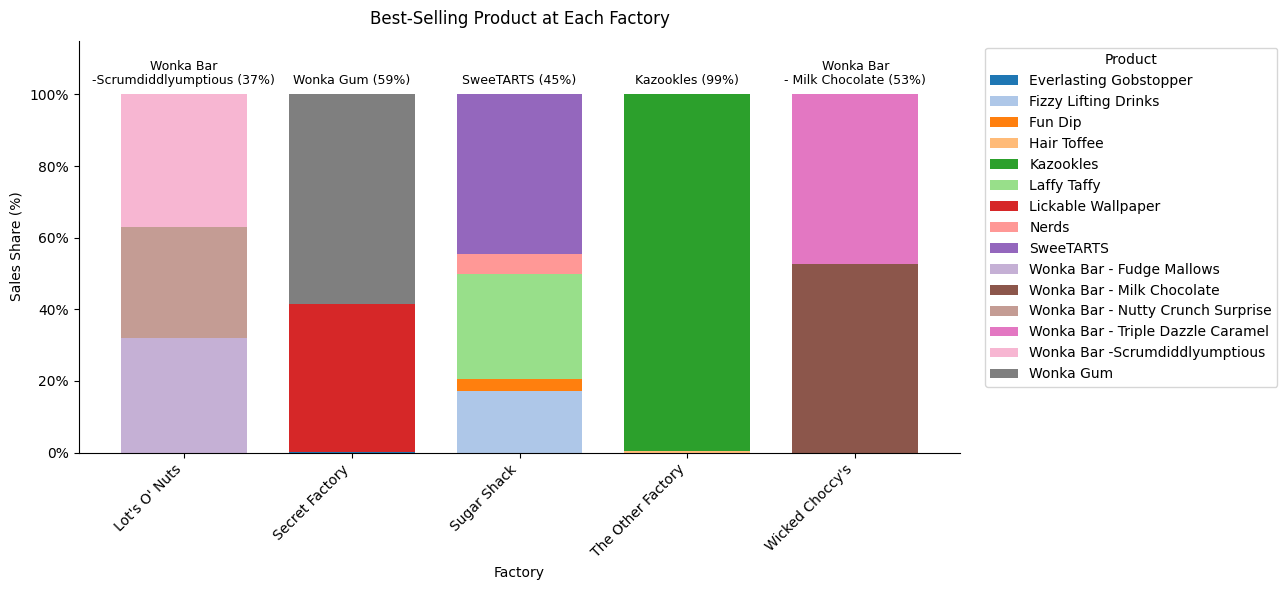

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# =========================
# Load data
# =========================
df = pd.read_csv("Data/produt_sales_factory.csv")

# Detect columns (CSV as-is)
cols = df.columns
factory_col = [c for c in cols if "factory" in c.lower()][0]
product_col = [c for c in cols if "product" in c.lower()][0]
sales_col   = [c for c in cols if any(k in c.lower() for k in ["sales", "quantity", "units"])][0]

# =========================
# Aggregate sales
# =========================
df_agg = (
    df.groupby([factory_col, product_col], as_index=False)
      .agg(total_sales=(sales_col, "sum"))
)

# =========================
# Pivot to % (100% stacked)
# =========================
pivot = df_agg.pivot(
    index=factory_col,
    columns=product_col,
    values="total_sales"
).fillna(0)

pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

# =========================
# Plot
# =========================
fig, ax = plt.subplots(figsize=(13, 6))

# Better color palette
cmap = plt.get_cmap("tab20")
colors = [cmap(i) for i in range(pivot_pct.shape[1])]

pivot_pct.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=colors,
    width=0.75
)

# Axis formatting
ax.set_title("Best-Selling Product at Each Factory", pad=12)
ax.set_xlabel("Factory")
ax.set_ylabel("Sales Share (%)")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}%'))
ax.set_ylim(0, 115)  # headroom for labels

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(rotation=45, ha="right")

# =========================
# Add top product label above each bar
# =========================
top_product = pivot_pct.idxmax(axis=1)
top_share   = pivot_pct.max(axis=1)

for i, factory in enumerate(pivot_pct.index):
    product_label = top_product.loc[factory]

    # Split long Wonka Bar names into 2 lines
    if product_label.startswith("Wonka Bar"):
       product_label = product_label.replace("Wonka Bar -", "Wonka Bar\n-")


    label = f"{product_label} ({top_share.loc[factory]:.0f}%)"

    ax.text(
        i,
        102,
        label,
        ha="center",
        va="bottom",
        fontsize=9,
        linespacing=1.1,
        clip_on=False
    )

# Legend
ax.legend(
    title="Product",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()


Hypothesis 3: Rodrigo

	Customer Loyalty 
	
Wonka Customers loyalty through order date and ship date, maybe also units ordered? Create discounts and promo codes for loyal customers


-- Customer Lifetime Summary:

-- Best customer is 122336 with a life time sales of 12920.60$ with only 188 orders and with a value of 
-- each order on 68.7$
-- Customer with more orders is 100111 with a total of 709 orders and a revenue of 9268$, average order 
-- sitting on 13$.

-- Need to create a loyalty tier list for the customers in order to provide benefits for them:

-- Implementing benefits as discounts for silver, gold and premium cutomers:

-- Even tho our customer 122336 is our customer with more lifetime sales he is still 
-- a silver customer due to low order numbers (188 as seen before), only customers with high lifetime sales
-- and high number of orders (more than 300 orders) can be premium customers and have a 20% discount.
-- This makes customer 122336 the customer who brought more revenue so far but not the most loyal 
-- This prevents giving rewards to one time big spenders.
-- So, our most loyal customers are customer 164756 and customer 100111.

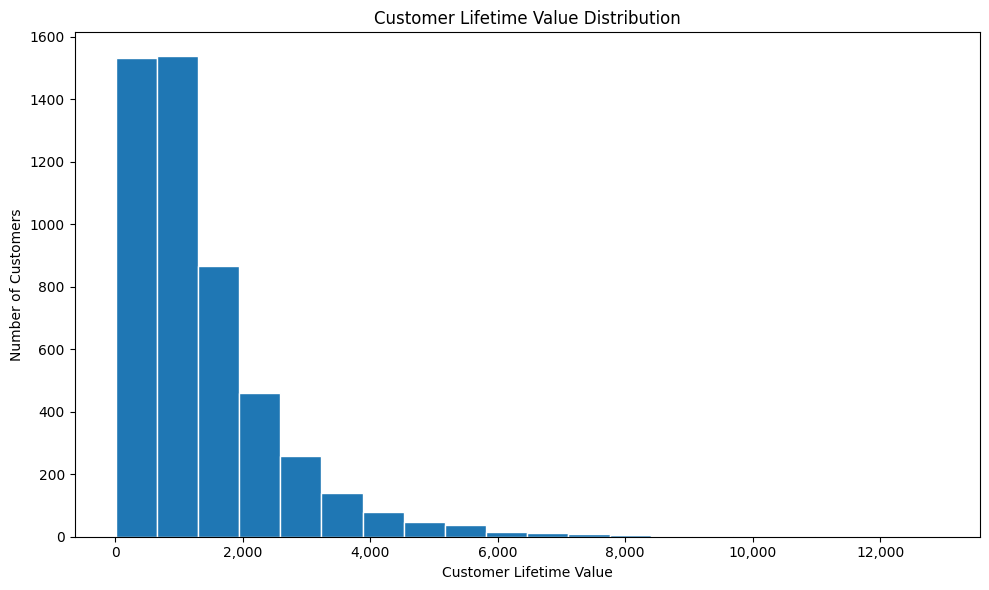

Detected CLV column: lifetime_sales


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load data
df_customer_loyalty = pd.read_csv("Data/customer_loyalty.csv")

# Inspect columns if needed
# print(df_customer_loyalty.columns)

# --- Auto-detect CLV column (as-is, no renaming) ---
cols = df_customer_loyalty.columns
clv_col = None
for c in cols:
    cl = c.lower()
    if "lifetime" in cl or "clv" in cl or ("value" in cl and "customer" in cl):
        clv_col = c
        break

if clv_col is None:
    raise ValueError(
        f"No Customer Lifetime Value column detected. Columns found: {list(cols)}"
    )

# Ensure numeric
df_customer_loyalty[clv_col] = pd.to_numeric(
    df_customer_loyalty[clv_col], errors="coerce"
)

# Drop missing values
df_plot = df_customer_loyalty.dropna(subset=[clv_col])

# Plot: histogram
plt.figure(figsize=(10, 6))
plt.hist(
    df_plot[clv_col],
    bins=20,
    edgecolor="white"
)

plt.title("Customer Lifetime Value Distribution")
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Number of Customers")

ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

print("Detected CLV column:", clv_col)


In [69]:
import pandas as pd

df_customer_loyalty = pd.read_csv("Data/customer_loyalty.csv")

cols = list(df_customer_loyalty.columns)

# --- Detect customer id ---
customer_col = next(
    (c for c in cols if "customer" in c.lower() and "id" in c.lower()),
    None
)

# --- Detect CLV ---
clv_col = next(
    (c for c in cols if "lifetime" in c.lower() or "clv" in c.lower()),
    None
)

# --- Detect number of orders (ROBUST) ---
orders_col = next(
    (c for c in cols if any(k in c.lower() for k in [
        "order", "orders", "purchase", "purchases", "transaction", "transactions"
    ])),
    None
)

if customer_col is None or clv_col is None or orders_col is None:
    raise ValueError(
        "Could not detect required columns.\n"
        f"Columns found: {cols}\n"
        f"Detected -> customer: {customer_col}, clv: {clv_col}, orders: {orders_col}"
    )

print("Detected columns:",
      "\n customer:", customer_col,
      "\n clv:", clv_col,
      "\n orders:", orders_col)


Detected columns: 
 customer: customer_id 
 clv: lifetime_sales 
 orders: total_orders


In [70]:
# Ensure numeric
df_customer_loyalty[clv_col] = pd.to_numeric(df_customer_loyalty[clv_col], errors="coerce")
df_customer_loyalty[orders_col] = pd.to_numeric(df_customer_loyalty[orders_col], errors="coerce")

df_customer_loyalty = df_customer_loyalty.dropna(subset=[clv_col, orders_col])

# Thresholds
clv_threshold = df_customer_loyalty[clv_col].quantile(0.80)

def loyalty_status(row):
    if row[clv_col] >= clv_threshold and row[orders_col] > 300:
        return "Premium"
    elif row[clv_col] >= df_customer_loyalty[clv_col].quantile(0.50):
        return "Silver"
    else:
        return "Standard"

df_customer_loyalty["loyalty_status"] = df_customer_loyalty.apply(loyalty_status, axis=1)


In [71]:
key_customers = [122336, 164756, 100111]

df_key = df_customer_loyalty[
    df_customer_loyalty[customer_col].isin(key_customers)
][
    [customer_col, clv_col, orders_col, "loyalty_status"]
]

df_key


,customer_id,lifetime_sales,total_orders,loyalty_status
0,164756,11044.60,366,Premium
1,100111,9268.95,709,Premium
19,122336,12920.60,188,Silver


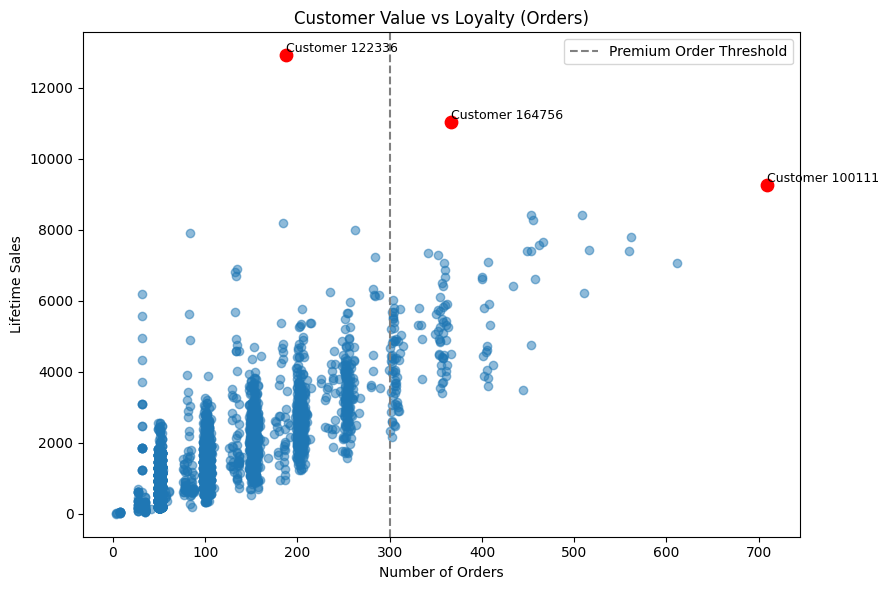

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

plt.scatter(
    df_customer_loyalty[orders_col],
    df_customer_loyalty[clv_col],
    alpha=0.5
)

# Highlight key customers
highlight = df_customer_loyalty[df_customer_loyalty[customer_col].isin(key_customers)]

plt.scatter(
    highlight[orders_col],
    highlight[clv_col],
    color="red",
    s=80
)

for _, row in highlight.iterrows():
    plt.text(
        row[orders_col],
        row[clv_col],
        f"Customer {int(row[customer_col])}",
        fontsize=9,
        ha="left",
        va="bottom"
    )

plt.axvline(300, linestyle="--", color="gray", label="Premium Order Threshold")
plt.xlabel("Number of Orders")
plt.ylabel("Lifetime Sales")
plt.title("Customer Value vs Loyalty (Orders)")
plt.legend()
plt.tight_layout()
plt.show()
